<a href="https://colab.research.google.com/github/systemcontroling/colab_project/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto_encoder는 대표적인 비지도 학습으로 지도학습과는 다르게 데이터의 숨겨진 구조를 찾는 과정이다.

In [0]:
import tensorflow as tf #tensorflow import 머신러닝 프레임 워크
import numpy as np  # numpy import 
import matplotlib.pyplot as plt #matplotilb import

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.03
training_epochs = 50
batch_size =256
display_step =1
example_to_show = 10
input_size = 784 #28*28
hidden1_size = 256
hidden2_size = 128

In [0]:
x = tf.placeholder(tf.float32, shape = [None , input_size])
#unsupervised learning은  Label를 지정해주지 않는다.(필요없음))

반복(epochs):1,손실함수(loss):0.191171
반복(epochs):2,손실함수(loss):0.117967
반복(epochs):3,손실함수(loss):0.094430
반복(epochs):4,손실함수(loss):0.084910
반복(epochs):5,손실함수(loss):0.067534
반복(epochs):6,손실함수(loss):0.068738
반복(epochs):7,손실함수(loss):0.063133
반복(epochs):8,손실함수(loss):0.059702
반복(epochs):9,손실함수(loss):0.058426
반복(epochs):10,손실함수(loss):0.056436
반복(epochs):11,손실함수(loss):0.053047
반복(epochs):12,손실함수(loss):0.055049
반복(epochs):13,손실함수(loss):0.053959
반복(epochs):14,손실함수(loss):0.050008
반복(epochs):15,손실함수(loss):0.051883
반복(epochs):16,손실함수(loss):0.049596
반복(epochs):17,손실함수(loss):0.049478
반복(epochs):18,손실함수(loss):0.048695
반복(epochs):19,손실함수(loss):0.047949
반복(epochs):20,손실함수(loss):0.047215
반복(epochs):21,손실함수(loss):0.045080
반복(epochs):22,손실함수(loss):0.044415
반복(epochs):23,손실함수(loss):0.043723
반복(epochs):24,손실함수(loss):0.044330
반복(epochs):25,손실함수(loss):0.044750
반복(epochs):26,손실함수(loss):0.042990
반복(epochs):27,손실함수(loss):0.041774
반복(epochs):28,손실함수(loss):0.038881
반복(epochs):29,손실함수(loss):0.041935
반복(epochs):30,손실함수(loss

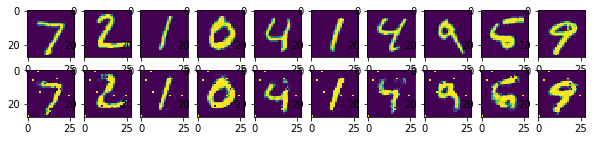

In [10]:
def builed_autoencoder(x):
  w1 = tf.Variable(tf.random_normal(shape = [input_size ,hidden1_size]))
  b1 = tf.Variable(tf.random_normal(shape =[hidden1_size]))
  h1_output = tf.nn.sigmoid(tf.matmul(x, w1)+ b1)
  w2 = tf.Variable(tf.random_normal(shape = [hidden1_size, hidden2_size]))
  b2 = tf.Variable(tf.random_normal(shape =[hidden2_size]))
  h2_output = tf.nn.sigmoid(tf.matmul(h1_output, w2)+b2)
  w3 = tf.Variable(tf.random_normal(shape = [hidden2_size, hidden1_size]))
  b3 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
  h3_output = tf.nn.sigmoid(tf.matmul(h2_output, w3)+b3)
  w4  =tf.Variable(tf.random_normal(shape = [hidden1_size, input_size]))
  b4 = tf.Variable(tf.random_normal(shape=[input_size]))
  reconstructed = tf.nn.sigmoid(tf.matmul(h3_output , w4)+b4)

  return reconstructed

y_pred = builed_autoencoder(x)
y_ture = x

loss = tf.reduce_mean(tf.pow(y_ture -y_pred, 2))
train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _,current_loss = sess.run([train_step, loss], feed_dict ={x:batch_xs})
    if epoch %display_step == 0:
       print("반복(epochs):%d,손실함수(loss):%f" %((epoch+1), current_loss))

  reconstructed_result = sess.run(y_pred, feed_dict ={x:mnist.test.images [:example_to_show]})
  f,a =plt.subplots(2, 10, figsize=(10,2))
  for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(reconstructed_result[i],(28,28)))
  f.savefig('reconstrutedz_mnist_result.png')

  #f.show()
  #plt.draw()
  #plt.waitforbuttonpress()